### Modélisation des données du Défi IA 2021-2022

Dans ce calepin, nous décrivons quelques éléments de modélisation des données du  Défi IA 2021-2022. Il est suggéré quelques pistes pour réaliser des statistiques descriptives de ces données ainsi qu'une approche de prévision du cumul de pluie à l'aide de la régression linéaire. Des codes en Python sont également proposés. Le but de calepin est également de vous aider à initier la rédaction d'un rapport sur votre travail dans ce Défi IA.

#### Données disponibles sur les stations de mesure

Sur les années 2016 et 2017, données d'apprentissage sur $N$ stations météorologiques dont on dispose des coordonnées spatiales (latitude et longitude).

Pour chaque station $1 \leq i \leq N$, on dispose des mesures suivantes :

**Variables explicatives** : mesure de $p$ variables $X_{ijt} = (X_{ijt}^{(k)})_{1 \leq k \leq p} \in \mathbb{R}^{p}$ pour la station $i$, le jour $j$ (variable non-ordonnée car non-disponible dans l'ensemble test) et l'heure $t \in \{0,\ldots,23 \}$ (variable ordonnée disponible dans l'ensemble test). Les mesures sont

- 'ff' : *inclure une description*
- 't' : *inclure une description*
- 'td' : *inclure une description*
- 'hu' : *humidité*
- 'dd' : *inclure une description*
- 'precip' : *cumul de pluie sur une heure en ml*

On peut également ajouter une variable sur le mois de l'année car cette information est disponible dans l'ensemble test.


**Variable à expliquer/prédire** : cumul de pluie $Y_{ij}$ sur une journée au jour $j+1$ dans la station $i$ à partir des données disponibles au jour $j$. Dans l'ensemble d'apprentissage, on dipose en fait de la variable $Y_{ijt}$ cumul de pluie  sur une journée au jour $j+1$ dans la station $i$ et àl'heure $t$. De façon évidente on a que (avec $T=23$)
$$
Y_{ij} = \sum_{t = 0}^{T} Y_{ijt}
$$

**Travail préliminaire** : proposer une analyse descriptive de ces données : boxplot, histogramme uni-varié, ACP pour étude des corrélation entre variables explicatives, etc...

**Modèles linéaires possibles de prévision du cumul de pluie** : 

*Modèle global temps par temps*

$$
Y_{ijt} = \theta_{0}^{t} + \sum_{k = 1}^{p} \theta_{k}^{t}X_{ijt}^{(k)} + \varepsilon_{ijt}
$$

et prévision par $\hat{Y}_{ij} = \sum_{t = 0}^{T} \hat{Y}_{ijt} $ où $\hat{Y}_{ijt} = \hat{\theta}_{0}^{t} + \sum_{k = 1}^{p} \hat{\theta}_{k}^{t}X_{ijt}^{(k)}$

*Modèle par station et temps par temps*

$$
Y_{ijt} = \theta_{0,i}^{t} + \sum_{k = 1}^{p} \theta_{k,i}^{t}X_{ijt}^{(k)} + \varepsilon_{ijt}
$$

où les cofficients du modèle linéaire varient selon la station de mesure.

*Modèle global avec agrégation du temps*

$$
Y_{ij} = \theta_{0} + \sum_{t = 0}^{T}  \sum_{k = 1}^{p} \theta_{k}^{t}X_{ijt}^{(k)} + \varepsilon_{ij}
$$

et bien d'autres modèles sont possibles !

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import os
os.chdir('/content/drive/My Drive/Données Massives/')

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np

# Suppression des messages d'erreur liés à des besoins de mise à jour de syntaxe en Python
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

warnings.filterwarnings("ignore")

In [ ]:
# Lecture des données de l'ensemble d'apprentissage 

path = 'defi-ia-2022/Train/Train/X_station_train.csv'
first_date = datetime.datetime(2016,1,1)    
last_date = datetime.datetime(2017,12,31)

# Read the ground station data
def read_gs_data(fname):
    gs_data = pd.read_csv(fname,parse_dates=['date'],infer_datetime_format=True)
    gs_data = gs_data.sort_values(by=["number_sta","date"])
    return gs_data

x = read_gs_data(path)
x['number_sta']=x['number_sta'].astype('category')

# Tri par station puis par datea
x = x.sort_values(['number_sta','date'])
x

,number_sta,date,ff,t,td,hu,dd,precip,Id
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4
...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22


In [ ]:
# Ajout des variables jour et heure
Xtrain = x
split_Id = Xtrain['Id'].str.split(pat="_", expand = True)
split_Id = split_Id.rename(columns={0: "number_sta_2", 1: "day", 2: "hour"})
Xtrain['number_sta_2'] = split_Id['number_sta_2']
Xtrain['day'] = split_Id["day"]
Xtrain['hour'] = split_Id["hour"]
Xtrain = Xtrain.drop("number_sta_2",axis=1)
display(Xtrain) 

,number_sta,date,ff,t,td,hu,dd,precip,Id,day,hour
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,0,0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,0,1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,0,2
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,0,3
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,0,4
...,...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,729,19
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,729,20
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,729,21
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,729,22


In [ ]:
#Ajout de mois 

Xtrain['month'] = pd.DatetimeIndex(Xtrain['date']).month
display(Xtrain) 

,number_sta,date,ff,t,td,hu,dd,precip,Id,day,hour,month
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,0,0,1
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,0,1,1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,0,2,1
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,0,3,1
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,729,19,12
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,729,20,12
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,729,21,12
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,729,22,12


In [ ]:
# Partage des données d'apprentissage en un ensemble d'entrainement (données de l'année 2016)
# et un ensemble de validation (donnée de l'année 2017)

Xtrain_2016 = Xtrain[Xtrain["date"] <  datetime.datetime(2017, 1, 1)]
print(Xtrain_2016.shape)

Xtrain_2017 = Xtrain[Xtrain["date"] >=  datetime.datetime(2017, 1, 1)]
print(Xtrain_2017.shape)

(2212784, 12)
(2196690, 12)


In [ ]:
display(Xtrain_2016)

,number_sta,date,ff,t,td,hu,dd,precip,Id,day,hour,month
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,0,0,1
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,0,1,1
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,0,2,1
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,0,3,1
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2212779,95690001,2016-12-31 19:00:00,NaN,269.44,269.00,96.6,NaN,0.0,95690001_365_19,365,19,12
2212780,95690001,2016-12-31 20:00:00,NaN,269.42,268.99,96.7,NaN,0.0,95690001_365_20,365,20,12
2212781,95690001,2016-12-31 21:00:00,NaN,269.40,268.96,96.6,NaN,0.0,95690001_365_21,365,21,12
2212782,95690001,2016-12-31 22:00:00,NaN,269.11,268.61,96.0,NaN,0.0,95690001_365_22,365,22,12


In [ ]:
################################################
# Inclure une analyse desciptive des données ! #
################################################

Barplot des précipitations

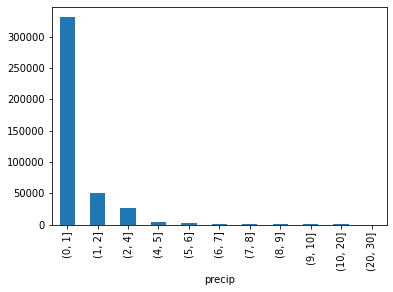

In [ ]:
bins = [0,1,2,4,5,6,7,8,9,10,20,30]
data_bar_precip = Xtrain.groupby(pd.cut(Xtrain['precip'], bins=bins)).count()
data_bar_precip['precip'].plot.bar()

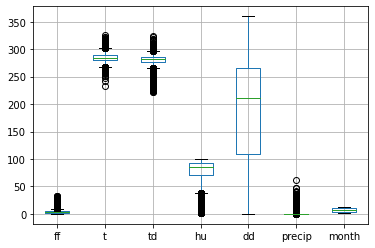

In [ ]:
Xtrain.boxplot()

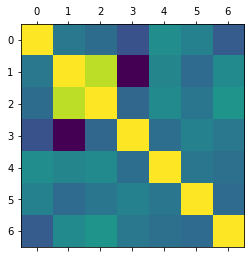

In [ ]:
corr_Xtrain = Xtrain.corr(method='pearson')
corr_Xtrain
plt.matshow(corr_Xtrain)
plt.show()

Matrice de corrélation de Xtrain
On retrouve une corrélation négative entre la température et l'humidité ce qui semble logique
On constate aussi une forte corrélation positive entre la température et td

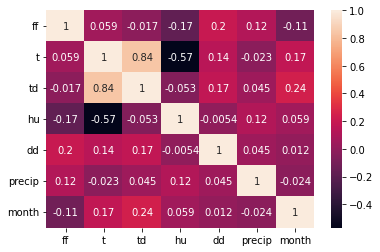

In [ ]:
sns.heatmap(corr_Xtrain,annot=True)
plt.show()

In [ ]:
#On rajoute deux variables 
#precip_bool: 1: il pleut 0: il ne pleut pas
#precip _ategories: 5 categories 0, 0.2, 0.4 , 0.6, 0.8+


#Xtrain_2017['col2'] = pd.cut(df['col1'], bins=[0, 10, 50, float('Inf')], labels=['xxx', 'yyy', 'zzz'])

#Xtrain_2017



In [ ]:
# Exemple d'implémentation du modèle linéaire par station et temps par temps mais avec
# des coefficients qui ne dépendent pas du temps
# Imputation de données manquantes par la médiane des variables

################################################################################################
# Attention, une erreur de mosélisation s'est glissée dans ce code, saurez-vous la retrouver ? #
################################################################################################

from sklearn.linear_model import LinearRegression

def regression_bystation (x,num_station):

    X = x[x['number_sta']==num_station]
    Y = X[{"date","precip"}]
    Y.set_index('date',inplace = True) 

    X = X[{"date","ff","t","td","hu","dd"}]
    X.set_index('date',inplace = True)

    # Imputation des valeurs manquantes
    median_t = X['t'].median()
    X['t'] = X['t'].fillna(median_t)

    median_ff = X['ff'].median()
    X['ff'] = X['ff'].fillna(median_ff)

    median_td = X['td'].median()
    X['td'] = X['td'].fillna(median_td)

    median_hu = X['hu'].median()
    X['hu'] = X['hu'].fillna(median_hu)

    median_dd = X['dd'].median()
    X['dd'] = X['dd'].fillna(median_dd)

    median_pre = Y['precip'].median()
    Y['precip'] = Y['precip'].fillna(median_pre)

    lr= LinearRegression(normalize=False)
    lr.fit(X, Y)

    return(lr)

ACP normée avec deux composantes principales


In [ ]:
from sklearn.preprocessing import StandardScaler

Xtrain = Xtrain.fillna(method='ffill')
features = ['ff','t','td','hu','dd']

X_acp = Xtrain.loc[:,features].values
X_acp = StandardScaler().fit_transform(X_acp)


Y_acp = Xtrain.loc[:,'precip'].values



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)

principalComponents = pca.fit_transform(X_acp)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])

finalDf = pd.concat([principalDf, Xtrain[['precip']]], axis = 1)



On récupère les valeurs propres de nos composantes principales

In [ ]:
pca.explained_variance_

array([1.86226586, 1.25663712, 0.97787122, 0.71903328, 0.18419365])

Notre première composante principale explique 37% de l'inertie tandis que la seconde composante principale explique 25 % de l'inertie.

In [ ]:
pca.explained_variance_ratio_

array([0.37245309, 0.25132737, 0.1955742 , 0.14380662, 0.03683872])

Visualisation des valeurs propres de nos composantes principales. 

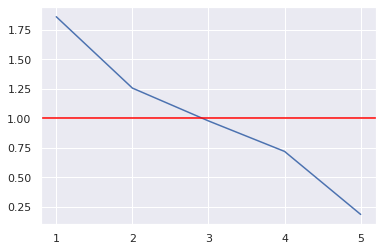

In [ ]:

sns.set_theme(style='darkgrid')
graph_variance = sns.lineplot(x=['1','2','3','4','5'],y = pca.explained_variance_)
graph_variance.axhline(1,color= 'red')

On constate que les composantes principales 1 et 2 ont des valeurs propres supérieurs à 1. 
Tandis que la troisième composante principale à une valeur propre très proche de 1 c'est pourquoi on décide aussi de la garder pour la suite selon la règle de Kaiser.


In [ ]:
display(finalDf)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,precip
0,1.466994,-0.120039,-0.221716,-0.514363,0.139778,0.0
1,1.637976,-0.289884,-0.217261,-0.537407,0.141746,0.0
2,1.791670,-0.409033,-0.222848,-0.529851,0.146857,0.0
3,1.913168,-0.476163,-0.282240,-0.242018,0.165365,0.0
4,2.035037,-0.208536,-0.363414,-0.270697,0.214705,0.0
...,...,...,...,...,...,...
4409469,-0.664325,0.998569,0.327438,0.513937,0.026701,0.0
4409470,-0.549742,0.839466,0.277978,0.474225,0.024837,0.0
4409471,-0.515125,0.873402,0.179495,0.568285,0.034254,0.0
4409472,-0.507336,0.915253,0.230610,0.645880,0.039194,0.0


S'il pleut, la variable class prend comme valeur 1, sinon elle prend comme valeur 2.


In [ ]:
finalDf['class'] = np.where(finalDf['precip'] == 0,1,2)
display(finalDf)



,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,precip,class
0,1.466994,-0.120039,-0.221716,-0.514363,0.139778,0.0,1
1,1.637976,-0.289884,-0.217261,-0.537407,0.141746,0.0,1
2,1.791670,-0.409033,-0.222848,-0.529851,0.146857,0.0,1
3,1.913168,-0.476163,-0.282240,-0.242018,0.165365,0.0,1
4,2.035037,-0.208536,-0.363414,-0.270697,0.214705,0.0,1
...,...,...,...,...,...,...,...
4409469,-0.664325,0.998569,0.327438,0.513937,0.026701,0.0,1
4409470,-0.549742,0.839466,0.277978,0.474225,0.024837,0.0,1
4409471,-0.515125,0.873402,0.179495,0.568285,0.034254,0.0,1
4409472,-0.507336,0.915253,0.230610,0.645880,0.039194,0.0,1


Scatter plot avec les deux premières composantes principales

In [ ]:
sns.scatterplot(data = finalDf,x= 'principal component 1', y = 'principal component 2', hue='class')

NameError: name 'sns' is not defined

En 3 dimensions cela devient illisible.

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 10.5)
ax = fig.add_subplot(111, projection='3d')
x = np.array(finalDf['principal component 1'])
y = np.array(finalDf['principal component 2'])
z = np.array(finalDf['principal component 3'])
ax.scatter(x,y,z, marker="s", c=finalDf["class"], s=20, cmap="RdBu")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

On va tenter d'ajouter une variable explicative ayant une bonne corrélation avec la variable precip.Pour cela, on va utiliser l'algorithme knn qui va nous dire s'il pleut ou pas.
La nouvelle variable knn qui sera crée prendra en valeur la prédiction de la classe donnée par l'algorithme knn. ( soit il pleut soit il ne pleut pas)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
knn = KNeighborsClassifier(n_neighbors=10)



In [ ]:
Xtrain['class'] = np.where(finalDf['precip'] == 0,1,2)
X = Xtrain.drop(['date','class','Id'],axis=1)
Y = Xtrain['class']
X['day'] = X['day'].astype('category')
X['hour'] = X['hour'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=4,stratify=Y)

In [ ]:
Xtrain['year'] = Xtrain[]
Xtrain = Xtrain.fillna(method='ffill')
Xtrain_gp = Xtrain.groupby(by=['number_sta','day'])



On standardise nos données

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)




In [ ]:
#knn.fit(X_train,y_train)
#predictions = knn.predict(X_test)
#accuracy_score(y_test,predictions)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:

accuracy_score(y_test,np.repeat(1,y_test.shape[0]))


En ne prédisant que des 1 (i.e jours où il pleut), on obtient une précision de 90%

In [ ]:
predictions = knn.predict(X_test)
accuracy_score(y_test,predictions)

On obtient une précision de 91% avec knn (k=10)


On va maintenant tenter d'améliorer ce score en utilisant la méthode de validation croisée avec knn et en prenant une grille de valeur de k afin de choisir le k qui maximise la précision de notre modèle.


In [ ]:
from sklearn.model_selection import GridSearchCV 
knn2 = KNeighborsClassifier() 
param_grid = {"n_neighbors" : np.arange(1, 25)}
knn_cv = GridSearchCV(knn2, param_grid, cv=3)
knn_cv.fit(X, Y)

In [ ]:
from sklearn.model_selection import GridSearchCV 
knn2 = KNeighborsClassifier() 
param_grid = {"n_neighbors" : np.arange(1, 25)}

In [ ]:
# Test de la fonction pour une station avec les données de 2016
num_station = 95690001 
lr = regression_bystation(Xtrain_2016,num_station)

print(lr.intercept_)
print(lr.coef_)

# Erreur de prévision sur la station sur les données de 2017
X = Xtrain_2017[Xtrain_2017['number_sta']==num_station]
Y = X[{"date","precip"}]
Y.set_index('date',inplace = True) 

# Imputation des valeurs manquantes
X = X[{"date","ff","t","td","hu","dd"}]
X.set_index('date',inplace = True)

median_t = X['t'].median()
X['t'] = X['t'].fillna(median_t)

median_ff = X['ff'].median()
X['ff'] = X['ff'].fillna(median_ff)

median_td = X['td'].median()
X['td'] = X['td'].fillna(median_td)

median_hu = X['hu'].median()
X['hu'] = X['hu'].fillna(median_hu)

median_dd = X['dd'].median()
X['dd'] = X['dd'].fillna(median_dd)

median_pre = Y['precip'].median()
Y['precip'] = Y['precip'].fillna(median_pre)

Ypred = lr.predict(X)
print(np.mean(np.abs(Ypred-Y)/(Y+1))*100)
    
# Le calcul des performances de ce modèle est à réaliser ensuite sur l'ensemble des stations

In [ ]:
# Partage des données d'apprentissage en un ensemble d'entrainement (données de l'année 2016)
# et un ensemble de validation (donnée de l'année 2017)

Xtrain_2016 = Xtrain[Xtrain["date"] <  datetime.datetime(2017, 1, 1)]
print(Xtrain_2016.shape)

Xtrain_2017 = Xtrain[Xtrain["date"] >=  datetime.datetime(2017, 1, 1)]
print(Xtrain_2017.shape)

(2212784, 12)
(2196690, 12)


In [ ]:
# Réorganisation des données pour modèle avec aggrégation dans le temps
Xtrain_2016["number_sta_day"] = Xtrain_2016['number_sta'].astype(str) + '_' + Xtrain_2016['day'].astype(str)
X_2016 = Xtrain_2016[["number_sta_day","ff","t","td","hu","dd","precip","hour","date"]]
X_2016

,number_sta_day,ff,t,td,hu,dd,precip,hour,date
0,14066001_0,3.05,279.28,277.97,91.4,200.0,0.0,0,2016-01-01 00:00:00
1,14066001_0,2.57,278.76,277.45,91.4,190.0,0.0,1,2016-01-01 01:00:00
2,14066001_0,2.26,278.27,277.02,91.7,181.0,0.0,2,2016-01-01 02:00:00
3,14066001_0,2.62,277.98,276.95,93.0,159.0,0.0,3,2016-01-01 03:00:00
4,14066001_0,2.99,277.32,276.72,95.9,171.0,0.0,4,2016-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
2212779,95690001_365,2.50,269.44,269.00,96.6,335.0,0.0,19,2016-12-31 19:00:00
2212780,95690001_365,2.50,269.42,268.99,96.7,335.0,0.0,20,2016-12-31 20:00:00
2212781,95690001_365,2.50,269.40,268.96,96.6,335.0,0.0,21,2016-12-31 21:00:00
2212782,95690001_365,2.50,269.11,268.61,96.0,335.0,0.0,22,2016-12-31 22:00:00


In [ ]:
# Réorganisation des données pour modèle avec aggrégation dans le temps
Xtrain_2017["number_sta_day"] = Xtrain_2017['number_sta'].astype(str) + '_' + Xtrain_2017['day'].astype(str)
X_2017 = Xtrain_2017[["number_sta_day","ff","t","td","hu","dd","precip","hour","date"]]
X_2017



,number_sta_day,ff,t,td,hu,dd,precip,hour,date
2212784,14066001_366,1.22,269.90,269.38,96.0,146.0,0.0,0,2017-01-01 00:00:00
2212785,14066001_366,0.10,270.51,269.95,95.9,30.0,0.0,1,2017-01-01 01:00:00
2212786,14066001_366,0.59,271.24,270.65,96.0,113.0,0.0,2,2017-01-01 02:00:00
2212787,14066001_366,0.66,271.34,270.80,96.3,52.0,0.0,3,2017-01-01 03:00:00
2212788,14066001_366,1.68,270.91,270.37,96.3,138.0,0.0,4,2017-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
4409469,95690001_729,9.10,286.68,283.44,80.8,239.0,0.0,19,2017-12-30 19:00:00
4409470,95690001_729,8.58,286.39,283.21,81.1,231.0,0.0,20,2017-12-30 20:00:00
4409471,95690001_729,8.74,286.28,283.40,82.6,226.0,0.0,21,2017-12-30 21:00:00
4409472,95690001_729,9.04,286.21,283.29,82.4,224.0,0.0,22,2017-12-30 22:00:00


In [ ]:
X_2016['ff_idx'] = 'ff_' + X_2016["hour"].astype(str)
X_2016['t_idx'] = 't_' + X_2016["hour"].astype(str)
X_2016['td_idx'] = 'td_' + X_2016["hour"].astype(str)
X_2016['hu_idx'] = 'hu_' + X_2016["hour"].astype(str)
X_2016['dd_idx'] = 'dd_' + X_2016["hour"].astype(str)
X_2016['precip_idx'] = 'precip_' + X_2016["hour"].astype(str)

X_2017['ff_idx'] = 'ff_' + X_2017["hour"].astype(str)
X_2017['t_idx'] = 't_' + X_2017["hour"].astype(str)
X_2017['td_idx'] = 'td_' + X_2017["hour"].astype(str)
X_2017['hu_idx'] = 'hu_' + X_2017["hour"].astype(str)
X_2017['dd_idx'] = 'dd_' + X_2017["hour"].astype(str)
X_2017['precip_idx'] = 'precip_' + X_2017["hour"].astype(str)

In [ ]:
ff_2016 = X_2016.pivot(index='number_sta_day',columns='ff_idx',values='ff')
t_2016 = X_2016.pivot(index='number_sta_day',columns='t_idx',values='t')
td_2016 = X_2016.pivot(index='number_sta_day',columns='td_idx',values='td')
hu_2016 = X_2016.pivot(index='number_sta_day',columns='hu_idx',values='hu')
dd_2016 = X_2016.pivot(index='number_sta_day',columns='dd_idx',values='dd')
precip_2016 = X_2016.pivot(index='number_sta_day',columns='precip_idx',values='precip')

ff_2017 = X_2017.pivot(index='number_sta_day',columns='ff_idx',values='ff')
t_2017 = X_2017.pivot(index='number_sta_day',columns='t_idx',values='t')
td_2017 = X_2017.pivot(index='number_sta_day',columns='td_idx',values='td')
hu_2017 = X_2017.pivot(index='number_sta_day',columns='hu_idx',values='hu')
dd_2017 = X_2017.pivot(index='number_sta_day',columns='dd_idx',values='dd')
precip_2017 = X_2017.pivot(index='number_sta_day',columns='precip_idx',values='precip')

In [ ]:
X_2016_reshape = pd.concat([ff_2016,t_2016,td_2016,hu_2016,dd_2016,precip_2016],axis=1)
X_2017_reshape = pd.concat([ff_2017,t_2017,td_2017,hu_2017,dd_2017,precip_2017],axis=1)

In [ ]:
X_2016_reshape.reset_index(inplace=True)
X_2016_reshape

,number_sta_day,ff_0,ff_1,ff_10,ff_11,ff_12,ff_13,ff_14,ff_15,ff_16,ff_17,ff_18,ff_19,ff_2,ff_20,ff_21,ff_22,ff_23,ff_3,ff_4,ff_5,ff_6,ff_7,ff_8,ff_9,t_0,t_1,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_2,t_20,t_21,...,dd_16,dd_17,dd_18,dd_19,dd_2,dd_20,dd_21,dd_22,dd_23,dd_3,dd_4,dd_5,dd_6,dd_7,dd_8,dd_9,precip_0,precip_1,precip_10,precip_11,precip_12,precip_13,precip_14,precip_15,precip_16,precip_17,precip_18,precip_19,precip_2,precip_20,precip_21,precip_22,precip_23,precip_3,precip_4,precip_5,precip_6,precip_7,precip_8,precip_9
0,14066001_0,3.05,2.570,3.38,3.20,3.85,5.19,6.04,4.430000,5.100000,5.620000,4.74,5.17,2.26,5.75,5.36,4.42,4.75,2.620,2.99,2.50,2.32,2.29,2.79,3.54,279.28,278.76,280.66,281.42,282.16,282.59,282.50,282.26,281.84,281.35,281.30,281.69,278.27,282.05,282.22,...,124.000000,123.0,130.0,138.0,181.0,149.0,149.0,150.0,142.0,159.0,171.0,164.0,143.0,131.0,133.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14066001_1,4.73,4.220,9.45,11.51,11.52,10.79,10.53,9.660000,10.260000,10.090000,10.15,8.06,5.95,7.99,7.44,6.29,6.85,6.100,6.44,6.55,6.80,7.02,6.65,7.94,282.44,282.81,283.17,282.93,283.02,282.99,282.80,282.66,282.47,282.26,281.97,281.79,283.81,281.93,281.99,...,239.000000,240.0,240.0,234.0,170.0,241.0,237.0,232.0,222.0,171.0,184.0,185.0,186.0,190.0,189.0,192.0,0.0,0.0,1.4,0.4,0.0,0.6,0.6,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14066001_10,3.68,4.700,7.78,8.08,6.89,5.54,7.01,7.100000,6.410000,3.810000,3.68,5.28,4.98,5.40,5.42,4.32,5.93,4.550,4.25,4.08,3.66,3.86,6.30,7.10,278.23,278.83,280.48,280.47,280.17,281.33,281.01,280.19,279.82,279.12,277.91,278.31,279.57,278.82,279.66,...,233.000000,249.0,228.0,225.0,172.0,217.0,234.0,235.0,245.0,172.0,173.0,173.0,190.0,196.0,202.0,212.0,0.0,0.0,0.0,0.6,0.4,0.0,2.0,0.0,0.4,0.4,0.2,0.0,1.4,0.0,0.2,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14066001_100,2.09,2.750,6.80,6.40,6.73,5.62,4.92,5.490000,5.410000,5.540000,6.88,3.15,2.90,4.75,4.47,3.27,0.79,2.420,2.61,2.89,2.87,3.97,4.40,5.99,275.80,276.16,283.95,284.56,286.26,286.55,286.83,287.37,287.57,287.16,284.69,284.18,275.87,285.26,284.55,...,112.000000,110.0,199.0,130.0,148.0,135.0,118.0,135.0,157.0,150.0,144.0,134.0,140.0,141.0,132.0,131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,9.5,0.4,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14066001_101,1.23,1.350,2.08,2.33,2.64,2.48,2.83,1.690000,1.960000,2.290000,2.01,1.12,1.20,0.98,1.01,2.44,1.20,2.110,1.51,0.86,1.42,1.04,1.89,2.44,282.05,282.44,285.38,285.41,284.66,284.49,284.17,283.85,282.96,282.41,282.28,281.55,282.64,280.37,280.16,...,117.000000,129.0,155.0,158.0,151.0,178.0,173.0,156.0,135.0,171.0,172.0,190.0,180.0,220.0,286.0,257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,2.2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92204,95690001_361,2.03,2.050,0.17,1.73,1.89,1.15,1.76,2.410000,2.670000,2.160000,0.99,1.90,1.31,1.50,2.44,2.18,2.69,1.050,0.21,1.04,0.78,0.86,0.32,0.17,273.86,273.52,276.70,278.62,279.50,280.30,279.68,278.50,277.03,276.02,274.74,274.48,273.36,274.00,274.12,...,51.000000,79.0,110.0,108.0,234.0,117.0,102.0,93.0,91.0,302.0,117.0,316.0,294.0,294.0,90.0,95.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92205,95690001_362,1.99,3.130,1.87,2.62,3.52,3.29,2.98,2.860000,2.560000,3.890000,4.63,4.05,2.89,2.41,2.22,1.53,2.29,2.750,2.20,2.52,2.27,3.45,2.66,2.52,273.54,273.36,275.77,276.87,278.09,279.05,279.66,278.57,276.46,276.01,275.59,275.03,273.30,274.47,274.17,...,99.000000,90.0,91.0,103.0,91.0,103.0,96.0,99.0,101.0,96.0,112.0,101.0,98.0,101.0,111.0,106.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
X_2017_reshape.reset_index(inplace=True)
X_2017_reshape

,number_sta_day,ff_0,ff_1,ff_10,ff_11,ff_12,ff_13,ff_14,ff_15,ff_16,ff_17,ff_18,ff_19,ff_2,ff_20,ff_21,ff_22,ff_23,ff_3,ff_4,ff_5,ff_6,ff_7,ff_8,ff_9,t_0,t_1,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_2,t_20,t_21,...,dd_16,dd_17,dd_18,dd_19,dd_2,dd_20,dd_21,dd_22,dd_23,dd_3,dd_4,dd_5,dd_6,dd_7,dd_8,dd_9,precip_0,precip_1,precip_10,precip_11,precip_12,precip_13,precip_14,precip_15,precip_16,precip_17,precip_18,precip_19,precip_2,precip_20,precip_21,precip_22,precip_23,precip_3,precip_4,precip_5,precip_6,precip_7,precip_8,precip_9
0,14066001_366,1.22,0.10,3.89,2.03,5.30,5.96,4.86,4.03,3.86,4.27,4.90,4.26,0.59,4.52,4.48,3.69,2.87,0.66,1.68,1.46,4.85,6.08,4.72,4.06,269.90,270.51,276.16,276.66,276.78,277.16,277.11,276.58,276.33,275.68,275.64,275.90,271.24,275.91,275.87,...,181.0,179.0,187.0,189.0,113.0,190.0,182.0,172.0,162.0,52.0,138.0,121.0,193.0,204.0,190.0,182.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
1,14066001_367,1.30,1.66,4.77,5.14,5.31,5.10,5.13,5.80,4.56,4.83,3.09,2.89,1.89,1.59,1.39,1.22,0.79,1.31,1.52,0.67,0.68,6.08,6.81,6.01,276.22,276.13,278.94,279.96,280.19,280.54,280.20,279.88,279.52,279.50,278.60,278.36,276.11,276.62,274.61,...,57.0,58.0,82.0,80.0,185.0,103.0,136.0,141.0,150.0,184.0,198.0,194.0,37.0,71.0,69.0,71.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,0.2,0.4,0.0,0.0,0.0
2,14066001_368,1.24,1.36,3.45,3.34,3.55,4.07,3.43,2.98,2.78,3.13,3.88,4.26,2.37,4.54,4.52,5.38,5.71,1.94,2.27,1.50,2.50,1.92,2.15,3.18,271.74,271.76,275.90,278.08,279.81,280.34,280.29,279.17,276.80,275.41,275.02,274.66,273.42,274.84,274.91,...,244.0,231.0,226.0,223.0,194.0,228.0,230.0,230.0,231.0,204.0,204.0,204.0,207.0,196.0,205.0,218.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14066001_369,5.26,5.06,7.06,7.32,7.46,7.58,6.41,6.49,6.74,5.02,6.13,5.83,4.32,5.55,5.36,6.18,4.95,4.39,4.96,4.67,7.79,6.80,6.57,6.33,275.43,276.47,281.32,281.61,281.68,281.74,281.83,282.07,281.90,281.81,281.40,281.15,276.70,281.10,280.92,...,348.0,345.0,171.0,47.0,241.0,38.0,34.0,45.0,42.0,228.0,256.0,268.0,319.0,311.0,321.0,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14066001_370,3.77,3.80,0.93,1.46,2.05,1.94,1.08,0.59,0.18,0.67,0.60,0.22,3.68,1.15,1.15,2.48,2.63,4.05,3.81,4.02,3.61,1.79,0.95,0.50,279.96,279.91,279.26,280.37,280.90,280.68,280.58,279.98,276.48,273.20,272.17,271.58,279.91,272.18,271.77,...,55.0,166.0,154.0,61.0,28.0,177.0,183.0,195.0,199.0,30.0,30.0,39.0,34.0,114.0,112.0,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91533,95690001_725,8.48,9.21,7.40,7.22,6.82,6.88,7.09,5.77,6.43,7.12,8.37,9.67,8.03,10.40,10.87,12.28,10.19,4.93,4.50,4.83,6.03,7.47,7.62,7.17,278.57,278.89,278.52,278.99,279.36,279.32,279.66,279.77,280.26,280.57,280.54,280.63,278.74,280.13,279.84,...,171.0,170.0,170.0,171.0,219.0,171.0,176.0,183.0,177.0,259.0,247.0,247.0,245.0,230.0,218.0,218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
91534,95690001_726,7.76,9.47,7.49,10.45,9.44,12.49,12.29,12.05,11.24,10.49,9.04,8.89,8.43,9.45,8.14,5.33,5.84,6.52,5.99,5.07,5.93,5.01,4.11,4.30,279.01,279.33,277.88,277.24,276.98,276.55,275.80,276.42,276.69,276.61,276.68,276.71,279.51,276.36,275.72,...,307.0,310.0,302.0,300.0,205.0,300.0,299.0,285.0,282.0,203.0,204.0,208.0,201.0,187.0,181.0,188.0,0.0,0.0,0.2,0.0,0.0,0.2,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.8
91535,95690001_727,6.04,5.15,2.90,2.43,3.93,4.48,4.48,4.06,3.16,2.85,3.11,2.38,

In [ ]:
# Données de cumul de pluie
fname = 'defi-ia-2022/Train/Train/Y_train.csv'
param = 'Ground_truth'  #weather parameter name in the file ('Ground_truth' about Y and 'Prediction' about baseline)
data = pd.read_csv(fname, parse_dates=['date'], infer_datetime_format=True)
data['number_sta'] = data['number_sta'].astype('category')
display(data)

,date,number_sta,Ground_truth,Id
0,2016-01-02,14066001,3.4,14066001_0
1,2016-01-02,14126001,0.5,14126001_0
2,2016-01-02,14137001,3.4,14137001_0
3,2016-01-02,14216001,4.0,14216001_0
4,2016-01-02,14296001,13.3,14296001_0
...,...,...,...,...
183742,2017-12-31,86137003,5.0,86137003_729
183743,2017-12-31,86165005,3.2,86165005_729
183744,2017-12-31,86272002,1.8,86272002_729
183745,2017-12-31,91200002,1.6,91200002_729


In [ ]:
data_2016 = data[data["date"] <  datetime.datetime(2017, 1, 1)]
print(data_2016.shape)

data_2017 = data[data["date"] >=  datetime.datetime(2017, 1, 1)]
print(data_2017.shape)

(91960, 4)
(91787, 4)


In [ ]:
Y_2016 = data_2016[["Ground_truth","Id"]]
Y_2016.rename(columns = {"Ground_truth":"Y","Id":"number_sta_day"},inplace=True)
display(Y_2016)

,Y,number_sta_day
0,3.4,14066001_0
1,0.5,14126001_0
2,3.4,14137001_0
3,4.0,14216001_0
4,13.3,14296001_0
...,...,...
91955,0.0,86137003_364
91956,0.0,86165005_364
91957,0.0,86272002_364
91958,0.0,91200002_364


In [ ]:
Y_2017 = data_2017[["Ground_truth","Id"]]
Y_2017.rename(columns = {"Ground_truth":"Y","Id":"number_sta_day"},inplace=True)
display(Y_2017)

,Y,number_sta_day
91960,0.2,14066001_365
91961,0.0,14126001_365
91962,0.0,14137001_365
91963,0.0,14216001_365
91964,0.2,14296001_365
...,...,...
183742,5.0,86137003_729
183743,3.2,86165005_729
183744,1.8,86272002_729
183745,1.6,91200002_729


In [ ]:
all_data_2016 = pd.merge(X_2016_reshape,Y_2016)
all_data_2017 = pd.merge(X_2017_reshape,Y_2017)

display(all_data_2016)

display(all_data_2017)

,number_sta_day,ff_0,ff_1,ff_10,ff_11,ff_12,ff_13,ff_14,ff_15,ff_16,ff_17,ff_18,ff_19,ff_2,ff_20,ff_21,ff_22,ff_23,ff_3,ff_4,ff_5,ff_6,ff_7,ff_8,ff_9,t_0,t_1,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_2,t_20,t_21,...,dd_17,dd_18,dd_19,dd_2,dd_20,dd_21,dd_22,dd_23,dd_3,dd_4,dd_5,dd_6,dd_7,dd_8,dd_9,precip_0,precip_1,precip_10,precip_11,precip_12,precip_13,precip_14,precip_15,precip_16,precip_17,precip_18,precip_19,precip_2,precip_20,precip_21,precip_22,precip_23,precip_3,precip_4,precip_5,precip_6,precip_7,precip_8,precip_9,Y
0,14066001_0,3.05,2.570,3.38,3.20,3.85,5.19,6.04,4.430000,5.100000,5.620000,4.74,5.17,2.26,5.75,5.36,4.42,4.75,2.620,2.99,2.50,2.32,2.29,2.79,3.54,279.28,278.76,280.66,281.42,282.16,282.59,282.50,282.26,281.84,281.35,281.30,281.69,278.27,282.05,282.22,...,123.0,130.0,138.0,181.0,149.0,149.0,150.0,142.0,159.0,171.0,164.0,143.0,131.0,133.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4
1,14066001_1,4.73,4.220,9.45,11.51,11.52,10.79,10.53,9.660000,10.260000,10.090000,10.15,8.06,5.95,7.99,7.44,6.29,6.85,6.100,6.44,6.55,6.80,7.02,6.65,7.94,282.44,282.81,283.17,282.93,283.02,282.99,282.80,282.66,282.47,282.26,281.97,281.79,283.81,281.93,281.99,...,240.0,240.0,234.0,170.0,241.0,237.0,232.0,222.0,171.0,184.0,185.0,186.0,190.0,189.0,192.0,0.0,0.0,1.4,0.4,0.0,0.6,0.6,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.7
2,14066001_10,3.68,4.700,7.78,8.08,6.89,5.54,7.01,7.100000,6.410000,3.810000,3.68,5.28,4.98,5.40,5.42,4.32,5.93,4.550,4.25,4.08,3.66,3.86,6.30,7.10,278.23,278.83,280.48,280.47,280.17,281.33,281.01,280.19,279.82,279.12,277.91,278.31,279.57,278.82,279.66,...,249.0,228.0,225.0,172.0,217.0,234.0,235.0,245.0,172.0,173.0,173.0,190.0,196.0,202.0,212.0,0.0,0.0,0.0,0.6,0.4,0.0,2.0,0.0,0.4,0.4,0.2,0.0,1.4,0.0,0.2,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,14066001_100,2.09,2.750,6.80,6.40,6.73,5.62,4.92,5.490000,5.410000,5.540000,6.88,3.15,2.90,4.75,4.47,3.27,0.79,2.420,2.61,2.89,2.87,3.97,4.40,5.99,275.80,276.16,283.95,284.56,286.26,286.55,286.83,287.37,287.57,287.16,284.69,284.18,275.87,285.26,284.55,...,110.0,199.0,130.0,148.0,135.0,118.0,135.0,157.0,150.0,144.0,134.0,140.0,141.0,132.0,131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,9.5,0.4,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6
4,14066001_101,1.23,1.350,2.08,2.33,2.64,2.48,2.83,1.690000,1.960000,2.290000,2.01,1.12,1.20,0.98,1.01,2.44,1.20,2.110,1.51,0.86,1.42,1.04,1.89,2.44,282.05,282.44,285.38,285.41,284.66,284.49,284.17,283.85,282.96,282.41,282.28,281.55,282.64,280.37,280.16,...,129.0,155.0,158.0,151.0,178.0,173.0,156.0,135.0,171.0,172.0,190.0,180.0,220.0,286.0,257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,2.2,0.0,0.0,0.0,0.0,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91942,95690001_360,5.65,4.470,5.28,4.74,6.08,6.28,5.06,4.230000,3.440000,2.510000,1.94,2.32,5.22,2.60,2.64,1.67,2.30,5.200,5.35,5.11,4.73,4.79,4.82,6.72,283.18,282.94,282.31,282.92,283.36,283.34,283.07,282.11,280.69,279.37,278.42,277.42,282.80,276.38,275.18,...,318.0,314.0,310.0,219.0,319.0,291.0,300.0,320.0,222.0,222.0,231.0,227.0,230.0,244.0,287.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4
91943,95690001_361,2.03,2.050,0.17,1.73,1.89,1.15,1.76,2.410000,2.670000,2.160000,0.99,1.90,1.31,1.50,2.44,2.18,2.69,1.050,0.21,1.04,0.78,0.86,0.32,0.17,273.86,273.52,276.70,278.62,279.50,280.30,279.68,278.50,277.03,276.02,274.74,274.48,273.36,274.00,274.12,...,79.0,110.0,108.0,234.0,117.0,102.0,93.0,91.0,302.0,117.0,316.0,294.0,294.0,90.0,95.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.

,number_sta_day,ff_0,ff_1,ff_10,ff_11,ff_12,ff_13,ff_14,ff_15,ff_16,ff_17,ff_18,ff_19,ff_2,ff_20,ff_21,ff_22,ff_23,ff_3,ff_4,ff_5,ff_6,ff_7,ff_8,ff_9,t_0,t_1,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_2,t_20,t_21,...,dd_17,dd_18,dd_19,dd_2,dd_20,dd_21,dd_22,dd_23,dd_3,dd_4,dd_5,dd_6,dd_7,dd_8,dd_9,precip_0,precip_1,precip_10,precip_11,precip_12,precip_13,precip_14,precip_15,precip_16,precip_17,precip_18,precip_19,precip_2,precip_20,precip_21,precip_22,precip_23,precip_3,precip_4,precip_5,precip_6,precip_7,precip_8,precip_9,Y
0,14066001_366,1.22,0.10,3.89,2.03,5.30,5.96,4.86,4.03,3.86,4.27,4.90,4.26,0.59,4.52,4.48,3.69,2.87,0.66,1.68,1.46,4.85,6.08,4.72,4.06,269.90,270.51,276.16,276.66,276.78,277.16,277.11,276.58,276.33,275.68,275.64,275.90,271.24,275.91,275.87,...,179.0,187.0,189.0,113.0,190.0,182.0,172.0,162.0,52.0,138.0,121.0,193.0,204.0,190.0,182.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,1.8
1,14066001_367,1.30,1.66,4.77,5.14,5.31,5.10,5.13,5.80,4.56,4.83,3.09,2.89,1.89,1.59,1.39,1.22,0.79,1.31,1.52,0.67,0.68,6.08,6.81,6.01,276.22,276.13,278.94,279.96,280.19,280.54,280.20,279.88,279.52,279.50,278.60,278.36,276.11,276.62,274.61,...,58.0,82.0,80.0,185.0,103.0,136.0,141.0,150.0,184.0,198.0,194.0,37.0,71.0,69.0,71.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,0.2,0.4,0.0,0.0,0.0,0.2
2,14066001_368,1.24,1.36,3.45,3.34,3.55,4.07,3.43,2.98,2.78,3.13,3.88,4.26,2.37,4.54,4.52,5.38,5.71,1.94,2.27,1.50,2.50,1.92,2.15,3.18,271.74,271.76,275.90,278.08,279.81,280.34,280.29,279.17,276.80,275.41,275.02,274.66,273.42,274.84,274.91,...,231.0,226.0,223.0,194.0,228.0,230.0,230.0,231.0,204.0,204.0,204.0,207.0,196.0,205.0,218.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14066001_369,5.26,5.06,7.06,7.32,7.46,7.58,6.41,6.49,6.74,5.02,6.13,5.83,4.32,5.55,5.36,6.18,4.95,4.39,4.96,4.67,7.79,6.80,6.57,6.33,275.43,276.47,281.32,281.61,281.68,281.74,281.83,282.07,281.90,281.81,281.40,281.15,276.70,281.10,280.92,...,345.0,171.0,47.0,241.0,38.0,34.0,45.0,42.0,228.0,256.0,268.0,319.0,311.0,321.0,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
4,14066001_370,3.77,3.80,0.93,1.46,2.05,1.94,1.08,0.59,0.18,0.67,0.60,0.22,3.68,1.15,1.15,2.48,2.63,4.05,3.81,4.02,3.61,1.79,0.95,0.50,279.96,279.91,279.26,280.37,280.90,280.68,280.58,279.98,276.48,273.20,272.17,271.58,279.91,272.18,271.77,...,166.0,154.0,61.0,28.0,177.0,183.0,195.0,199.0,30.0,30.0,39.0,34.0,114.0,112.0,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91521,95690001_725,8.48,9.21,7.40,7.22,6.82,6.88,7.09,5.77,6.43,7.12,8.37,9.67,8.03,10.40,10.87,12.28,10.19,4.93,4.50,4.83,6.03,7.47,7.62,7.17,278.57,278.89,278.52,278.99,279.36,279.32,279.66,279.77,280.26,280.57,280.54,280.63,278.74,280.13,279.84,...,170.0,170.0,171.0,219.0,171.0,176.0,183.0,177.0,259.0,247.0,247.0,245.0,230.0,218.0,218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,3.2
91522,95690001_726,7.76,9.47,7.49,10.45,9.44,12.49,12.29,12.05,11.24,10.49,9.04,8.89,8.43,9.45,8.14,5.33,5.84,6.52,5.99,5.07,5.93,5.01,4.11,4.30,279.01,279.33,277.88,277.24,276.98,276.55,275.80,276.42,276.69,276.61,276.68,276.71,279.51,276.36,275.72,...,310.0,302.0,300.0,205.0,300.0,299.0,285.0,282.0,203.0,204.0,208.0,201.0,187.0,181.0,188.0,0.0,0.0,0.2,0.0,0.0,0.2,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.8,0.0
91523,95690001_727,6.04,5.15,2.90,2.43,3.93,4.48,4.48,4.06,3.16,2.85,3.11,2.38,6.96,1.29,1.66,1

In [ ]:
all_data_2016.dropna(inplace=True)
display(all_data_2016)

all_data_2017.dropna(inplace=True)
display(all_data_2017)

,number_sta_day,ff_0,ff_1,ff_10,ff_11,ff_12,ff_13,ff_14,ff_15,ff_16,ff_17,ff_18,ff_19,ff_2,ff_20,ff_21,ff_22,ff_23,ff_3,ff_4,ff_5,ff_6,ff_7,ff_8,ff_9,t_0,t_1,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_2,t_20,t_21,...,dd_17,dd_18,dd_19,dd_2,dd_20,dd_21,dd_22,dd_23,dd_3,dd_4,dd_5,dd_6,dd_7,dd_8,dd_9,precip_0,precip_1,precip_10,precip_11,precip_12,precip_13,precip_14,precip_15,precip_16,precip_17,precip_18,precip_19,precip_2,precip_20,precip_21,precip_22,precip_23,precip_3,precip_4,precip_5,precip_6,precip_7,precip_8,precip_9,Y
0,14066001_0,3.05,2.570,3.38,3.20,3.85,5.19,6.04,4.430000,5.100000,5.620000,4.74,5.17,2.26,5.75,5.36,4.42,4.75,2.620,2.99,2.50,2.32,2.29,2.79,3.54,279.28,278.76,280.66,281.42,282.16,282.59,282.50,282.26,281.84,281.35,281.30,281.69,278.27,282.05,282.22,...,123.0,130.0,138.0,181.0,149.0,149.0,150.0,142.0,159.0,171.0,164.0,143.0,131.0,133.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.4
1,14066001_1,4.73,4.220,9.45,11.51,11.52,10.79,10.53,9.660000,10.260000,10.090000,10.15,8.06,5.95,7.99,7.44,6.29,6.85,6.100,6.44,6.55,6.80,7.02,6.65,7.94,282.44,282.81,283.17,282.93,283.02,282.99,282.80,282.66,282.47,282.26,281.97,281.79,283.81,281.93,281.99,...,240.0,240.0,234.0,170.0,241.0,237.0,232.0,222.0,171.0,184.0,185.0,186.0,190.0,189.0,192.0,0.0,0.0,1.4,0.4,0.0,0.6,0.6,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.7
2,14066001_10,3.68,4.700,7.78,8.08,6.89,5.54,7.01,7.100000,6.410000,3.810000,3.68,5.28,4.98,5.40,5.42,4.32,5.93,4.550,4.25,4.08,3.66,3.86,6.30,7.10,278.23,278.83,280.48,280.47,280.17,281.33,281.01,280.19,279.82,279.12,277.91,278.31,279.57,278.82,279.66,...,249.0,228.0,225.0,172.0,217.0,234.0,235.0,245.0,172.0,173.0,173.0,190.0,196.0,202.0,212.0,0.0,0.0,0.0,0.6,0.4,0.0,2.0,0.0,0.4,0.4,0.2,0.0,1.4,0.0,0.2,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,14066001_100,2.09,2.750,6.80,6.40,6.73,5.62,4.92,5.490000,5.410000,5.540000,6.88,3.15,2.90,4.75,4.47,3.27,0.79,2.420,2.61,2.89,2.87,3.97,4.40,5.99,275.80,276.16,283.95,284.56,286.26,286.55,286.83,287.37,287.57,287.16,284.69,284.18,275.87,285.26,284.55,...,110.0,199.0,130.0,148.0,135.0,118.0,135.0,157.0,150.0,144.0,134.0,140.0,141.0,132.0,131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,9.5,0.4,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.6
4,14066001_101,1.23,1.350,2.08,2.33,2.64,2.48,2.83,1.690000,1.960000,2.290000,2.01,1.12,1.20,0.98,1.01,2.44,1.20,2.110,1.51,0.86,1.42,1.04,1.89,2.44,282.05,282.44,285.38,285.41,284.66,284.49,284.17,283.85,282.96,282.41,282.28,281.55,282.64,280.37,280.16,...,129.0,155.0,158.0,151.0,178.0,173.0,156.0,135.0,171.0,172.0,190.0,180.0,220.0,286.0,257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,2.2,0.0,0.0,0.0,0.0,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91942,95690001_360,5.65,4.470,5.28,4.74,6.08,6.28,5.06,4.230000,3.440000,2.510000,1.94,2.32,5.22,2.60,2.64,1.67,2.30,5.200,5.35,5.11,4.73,4.79,4.82,6.72,283.18,282.94,282.31,282.92,283.36,283.34,283.07,282.11,280.69,279.37,278.42,277.42,282.80,276.38,275.18,...,318.0,314.0,310.0,219.0,319.0,291.0,300.0,320.0,222.0,222.0,231.0,227.0,230.0,244.0,287.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4
91943,95690001_361,2.03,2.050,0.17,1.73,1.89,1.15,1.76,2.410000,2.670000,2.160000,0.99,1.90,1.31,1.50,2.44,2.18,2.69,1.050,0.21,1.04,0.78,0.86,0.32,0.17,273.86,273.52,276.70,278.62,279.50,280.30,279.68,278.50,277.03,276.02,274.74,274.48,273.36,274.00,274.12,...,79.0,110.0,108.0,234.0,117.0,102.0,93.0,91.0,302.0,117.0,316.0,294.0,294.0,90.0,95.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.

,number_sta_day,ff_0,ff_1,ff_10,ff_11,ff_12,ff_13,ff_14,ff_15,ff_16,ff_17,ff_18,ff_19,ff_2,ff_20,ff_21,ff_22,ff_23,ff_3,ff_4,ff_5,ff_6,ff_7,ff_8,ff_9,t_0,t_1,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_2,t_20,t_21,...,dd_17,dd_18,dd_19,dd_2,dd_20,dd_21,dd_22,dd_23,dd_3,dd_4,dd_5,dd_6,dd_7,dd_8,dd_9,precip_0,precip_1,precip_10,precip_11,precip_12,precip_13,precip_14,precip_15,precip_16,precip_17,precip_18,precip_19,precip_2,precip_20,precip_21,precip_22,precip_23,precip_3,precip_4,precip_5,precip_6,precip_7,precip_8,precip_9,Y
0,14066001_366,1.22,0.10,3.89,2.03,5.30,5.96,4.86,4.03,3.86,4.27,4.90,4.26,0.59,4.52,4.48,3.69,2.87,0.66,1.68,1.46,4.85,6.08,4.72,4.06,269.90,270.51,276.16,276.66,276.78,277.16,277.11,276.58,276.33,275.68,275.64,275.90,271.24,275.91,275.87,...,179.0,187.0,189.0,113.0,190.0,182.0,172.0,162.0,52.0,138.0,121.0,193.0,204.0,190.0,182.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,1.8
1,14066001_367,1.30,1.66,4.77,5.14,5.31,5.10,5.13,5.80,4.56,4.83,3.09,2.89,1.89,1.59,1.39,1.22,0.79,1.31,1.52,0.67,0.68,6.08,6.81,6.01,276.22,276.13,278.94,279.96,280.19,280.54,280.20,279.88,279.52,279.50,278.60,278.36,276.11,276.62,274.61,...,58.0,82.0,80.0,185.0,103.0,136.0,141.0,150.0,184.0,198.0,194.0,37.0,71.0,69.0,71.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,0.2,0.4,0.0,0.0,0.0,0.2
2,14066001_368,1.24,1.36,3.45,3.34,3.55,4.07,3.43,2.98,2.78,3.13,3.88,4.26,2.37,4.54,4.52,5.38,5.71,1.94,2.27,1.50,2.50,1.92,2.15,3.18,271.74,271.76,275.90,278.08,279.81,280.34,280.29,279.17,276.80,275.41,275.02,274.66,273.42,274.84,274.91,...,231.0,226.0,223.0,194.0,228.0,230.0,230.0,231.0,204.0,204.0,204.0,207.0,196.0,205.0,218.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14066001_369,5.26,5.06,7.06,7.32,7.46,7.58,6.41,6.49,6.74,5.02,6.13,5.83,4.32,5.55,5.36,6.18,4.95,4.39,4.96,4.67,7.79,6.80,6.57,6.33,275.43,276.47,281.32,281.61,281.68,281.74,281.83,282.07,281.90,281.81,281.40,281.15,276.70,281.10,280.92,...,345.0,171.0,47.0,241.0,38.0,34.0,45.0,42.0,228.0,256.0,268.0,319.0,311.0,321.0,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
4,14066001_370,3.77,3.80,0.93,1.46,2.05,1.94,1.08,0.59,0.18,0.67,0.60,0.22,3.68,1.15,1.15,2.48,2.63,4.05,3.81,4.02,3.61,1.79,0.95,0.50,279.96,279.91,279.26,280.37,280.90,280.68,280.58,279.98,276.48,273.20,272.17,271.58,279.91,272.18,271.77,...,166.0,154.0,61.0,28.0,177.0,183.0,195.0,199.0,30.0,30.0,39.0,34.0,114.0,112.0,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91521,95690001_725,8.48,9.21,7.40,7.22,6.82,6.88,7.09,5.77,6.43,7.12,8.37,9.67,8.03,10.40,10.87,12.28,10.19,4.93,4.50,4.83,6.03,7.47,7.62,7.17,278.57,278.89,278.52,278.99,279.36,279.32,279.66,279.77,280.26,280.57,280.54,280.63,278.74,280.13,279.84,...,170.0,170.0,171.0,219.0,171.0,176.0,183.0,177.0,259.0,247.0,247.0,245.0,230.0,218.0,218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,3.2
91522,95690001_726,7.76,9.47,7.49,10.45,9.44,12.49,12.29,12.05,11.24,10.49,9.04,8.89,8.43,9.45,8.14,5.33,5.84,6.52,5.99,5.07,5.93,5.01,4.11,4.30,279.01,279.33,277.88,277.24,276.98,276.55,275.80,276.42,276.69,276.61,276.68,276.71,279.51,276.36,275.72,...,310.0,302.0,300.0,205.0,300.0,299.0,285.0,282.0,203.0,204.0,208.0,201.0,187.0,181.0,188.0,0.0,0.0,0.2,0.0,0.0,0.2,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.8,0.0
91523,95690001_727,6.04,5.15,2.90,2.43,3.93,4.48,4.48,4.06,3.16,2.85,3.11,2.38,6.96,1.29,1.66,1

In [ ]:
Y_NoNA_2016 = all_data_2016["Y"]
Y_NoNA_2016

0         3.4
1        11.7
2         1.0
3         5.6
4         3.2
         ... 
91942     0.4
91943     0.2
91944     0.0
91945     0.0
91946     0.0
Name: Y, Length: 80203, dtype: float64

In [ ]:
Y_NoNA_2017 = all_data_2017["Y"]
Y_NoNA_2017

0        1.8
1        0.2
2        0.0
3        0.2
4        0.2
        ... 
91521    3.2
91522    0.0
91523    4.4
91524    5.4
91525    1.2
Name: Y, Length: 81655, dtype: float64

In [ ]:
X_NoNA_2016 = all_data_2016.drop("Y",axis=1)
X_NoNA_2016

,number_sta_day,ff_0,ff_1,ff_10,ff_11,ff_12,ff_13,ff_14,ff_15,ff_16,ff_17,ff_18,ff_19,ff_2,ff_20,ff_21,ff_22,ff_23,ff_3,ff_4,ff_5,ff_6,ff_7,ff_8,ff_9,t_0,t_1,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_2,t_20,t_21,...,dd_16,dd_17,dd_18,dd_19,dd_2,dd_20,dd_21,dd_22,dd_23,dd_3,dd_4,dd_5,dd_6,dd_7,dd_8,dd_9,precip_0,precip_1,precip_10,precip_11,precip_12,precip_13,precip_14,precip_15,precip_16,precip_17,precip_18,precip_19,precip_2,precip_20,precip_21,precip_22,precip_23,precip_3,precip_4,precip_5,precip_6,precip_7,precip_8,precip_9
0,14066001_0,3.05,2.570,3.38,3.20,3.85,5.19,6.04,4.430000,5.100000,5.620000,4.74,5.17,2.26,5.75,5.36,4.42,4.75,2.620,2.99,2.50,2.32,2.29,2.79,3.54,279.28,278.76,280.66,281.42,282.16,282.59,282.50,282.26,281.84,281.35,281.30,281.69,278.27,282.05,282.22,...,124.000000,123.0,130.0,138.0,181.0,149.0,149.0,150.0,142.0,159.0,171.0,164.0,143.0,131.0,133.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14066001_1,4.73,4.220,9.45,11.51,11.52,10.79,10.53,9.660000,10.260000,10.090000,10.15,8.06,5.95,7.99,7.44,6.29,6.85,6.100,6.44,6.55,6.80,7.02,6.65,7.94,282.44,282.81,283.17,282.93,283.02,282.99,282.80,282.66,282.47,282.26,281.97,281.79,283.81,281.93,281.99,...,239.000000,240.0,240.0,234.0,170.0,241.0,237.0,232.0,222.0,171.0,184.0,185.0,186.0,190.0,189.0,192.0,0.0,0.0,1.4,0.4,0.0,0.6,0.6,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14066001_10,3.68,4.700,7.78,8.08,6.89,5.54,7.01,7.100000,6.410000,3.810000,3.68,5.28,4.98,5.40,5.42,4.32,5.93,4.550,4.25,4.08,3.66,3.86,6.30,7.10,278.23,278.83,280.48,280.47,280.17,281.33,281.01,280.19,279.82,279.12,277.91,278.31,279.57,278.82,279.66,...,233.000000,249.0,228.0,225.0,172.0,217.0,234.0,235.0,245.0,172.0,173.0,173.0,190.0,196.0,202.0,212.0,0.0,0.0,0.0,0.6,0.4,0.0,2.0,0.0,0.4,0.4,0.2,0.0,1.4,0.0,0.2,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14066001_100,2.09,2.750,6.80,6.40,6.73,5.62,4.92,5.490000,5.410000,5.540000,6.88,3.15,2.90,4.75,4.47,3.27,0.79,2.420,2.61,2.89,2.87,3.97,4.40,5.99,275.80,276.16,283.95,284.56,286.26,286.55,286.83,287.37,287.57,287.16,284.69,284.18,275.87,285.26,284.55,...,112.000000,110.0,199.0,130.0,148.0,135.0,118.0,135.0,157.0,150.0,144.0,134.0,140.0,141.0,132.0,131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,9.5,0.4,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14066001_101,1.23,1.350,2.08,2.33,2.64,2.48,2.83,1.690000,1.960000,2.290000,2.01,1.12,1.20,0.98,1.01,2.44,1.20,2.110,1.51,0.86,1.42,1.04,1.89,2.44,282.05,282.44,285.38,285.41,284.66,284.49,284.17,283.85,282.96,282.41,282.28,281.55,282.64,280.37,280.16,...,117.000000,129.0,155.0,158.0,151.0,178.0,173.0,156.0,135.0,171.0,172.0,190.0,180.0,220.0,286.0,257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,2.2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91942,95690001_360,5.65,4.470,5.28,4.74,6.08,6.28,5.06,4.230000,3.440000,2.510000,1.94,2.32,5.22,2.60,2.64,1.67,2.30,5.200,5.35,5.11,4.73,4.79,4.82,6.72,283.18,282.94,282.31,282.92,283.36,283.34,283.07,282.11,280.69,279.37,278.42,277.42,282.80,276.38,275.18,...,317.000000,318.0,314.0,310.0,219.0,319.0,291.0,300.0,320.0,222.0,222.0,231.0,227.0,230.0,244.0,287.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
91943,95690001_361,2.03,2.050,0.17,1.73,1.89,1.15,1.76,2.410000,2.670000,2.160000,0.99,1.90,1.31,1.50,2.44,2.18,2.69,1.050,0.21,1.04,0.78,0.86,0.32,0.17,273.86,273.52,276.70,278.62,279.50,280.30,279.68,278.50,277.03,276.02,274.74,274.48,273.36,274.00,274.12,...,51.000000,79.0,110.0,108.0,234.0,117.0,102.0,93.0,91.0,302.0,117.0,316.0,294.0,294.0,90.0,95.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
X_NoNA_2017 = all_data_2017.drop("Y",axis=1)
X_NoNA_2017

,number_sta_day,ff_0,ff_1,ff_10,ff_11,ff_12,ff_13,ff_14,ff_15,ff_16,ff_17,ff_18,ff_19,ff_2,ff_20,ff_21,ff_22,ff_23,ff_3,ff_4,ff_5,ff_6,ff_7,ff_8,ff_9,t_0,t_1,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_2,t_20,t_21,...,dd_16,dd_17,dd_18,dd_19,dd_2,dd_20,dd_21,dd_22,dd_23,dd_3,dd_4,dd_5,dd_6,dd_7,dd_8,dd_9,precip_0,precip_1,precip_10,precip_11,precip_12,precip_13,precip_14,precip_15,precip_16,precip_17,precip_18,precip_19,precip_2,precip_20,precip_21,precip_22,precip_23,precip_3,precip_4,precip_5,precip_6,precip_7,precip_8,precip_9
0,14066001_366,1.22,0.10,3.89,2.03,5.30,5.96,4.86,4.03,3.86,4.27,4.90,4.26,0.59,4.52,4.48,3.69,2.87,0.66,1.68,1.46,4.85,6.08,4.72,4.06,269.90,270.51,276.16,276.66,276.78,277.16,277.11,276.58,276.33,275.68,275.64,275.90,271.24,275.91,275.87,...,181.0,179.0,187.0,189.0,113.0,190.0,182.0,172.0,162.0,52.0,138.0,121.0,193.0,204.0,190.0,182.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
1,14066001_367,1.30,1.66,4.77,5.14,5.31,5.10,5.13,5.80,4.56,4.83,3.09,2.89,1.89,1.59,1.39,1.22,0.79,1.31,1.52,0.67,0.68,6.08,6.81,6.01,276.22,276.13,278.94,279.96,280.19,280.54,280.20,279.88,279.52,279.50,278.60,278.36,276.11,276.62,274.61,...,57.0,58.0,82.0,80.0,185.0,103.0,136.0,141.0,150.0,184.0,198.0,194.0,37.0,71.0,69.0,71.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.8,0.2,0.4,0.0,0.0,0.0
2,14066001_368,1.24,1.36,3.45,3.34,3.55,4.07,3.43,2.98,2.78,3.13,3.88,4.26,2.37,4.54,4.52,5.38,5.71,1.94,2.27,1.50,2.50,1.92,2.15,3.18,271.74,271.76,275.90,278.08,279.81,280.34,280.29,279.17,276.80,275.41,275.02,274.66,273.42,274.84,274.91,...,244.0,231.0,226.0,223.0,194.0,228.0,230.0,230.0,231.0,204.0,204.0,204.0,207.0,196.0,205.0,218.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14066001_369,5.26,5.06,7.06,7.32,7.46,7.58,6.41,6.49,6.74,5.02,6.13,5.83,4.32,5.55,5.36,6.18,4.95,4.39,4.96,4.67,7.79,6.80,6.57,6.33,275.43,276.47,281.32,281.61,281.68,281.74,281.83,282.07,281.90,281.81,281.40,281.15,276.70,281.10,280.92,...,348.0,345.0,171.0,47.0,241.0,38.0,34.0,45.0,42.0,228.0,256.0,268.0,319.0,311.0,321.0,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14066001_370,3.77,3.80,0.93,1.46,2.05,1.94,1.08,0.59,0.18,0.67,0.60,0.22,3.68,1.15,1.15,2.48,2.63,4.05,3.81,4.02,3.61,1.79,0.95,0.50,279.96,279.91,279.26,280.37,280.90,280.68,280.58,279.98,276.48,273.20,272.17,271.58,279.91,272.18,271.77,...,55.0,166.0,154.0,61.0,28.0,177.0,183.0,195.0,199.0,30.0,30.0,39.0,34.0,114.0,112.0,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91521,95690001_725,8.48,9.21,7.40,7.22,6.82,6.88,7.09,5.77,6.43,7.12,8.37,9.67,8.03,10.40,10.87,12.28,10.19,4.93,4.50,4.83,6.03,7.47,7.62,7.17,278.57,278.89,278.52,278.99,279.36,279.32,279.66,279.77,280.26,280.57,280.54,280.63,278.74,280.13,279.84,...,171.0,170.0,170.0,171.0,219.0,171.0,176.0,183.0,177.0,259.0,247.0,247.0,245.0,230.0,218.0,218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0
91522,95690001_726,7.76,9.47,7.49,10.45,9.44,12.49,12.29,12.05,11.24,10.49,9.04,8.89,8.43,9.45,8.14,5.33,5.84,6.52,5.99,5.07,5.93,5.01,4.11,4.30,279.01,279.33,277.88,277.24,276.98,276.55,275.80,276.42,276.69,276.61,276.68,276.71,279.51,276.36,275.72,...,307.0,310.0,302.0,300.0,205.0,300.0,299.0,285.0,282.0,203.0,204.0,208.0,201.0,187.0,181.0,188.0,0.0,0.0,0.2,0.0,0.0,0.2,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.8
91523,95690001_727,6.04,5.15,2.90,2.43,3.93,4.48,4.48,4.06,3.16,2.85,3.11,2.38,

In [ ]:
lr= LinearRegression(normalize=False)
lr.fit(X_NoNA_2016, Y_NoNA_2016)

LinearRegression(normalize=False)

In [ ]:
# Erreur sur 2016
Ypred_2016 = lr.predict(X_NoNA_2016)

np.mean(np.abs(Ypred_2016-Y_NoNA_2016)/(Y_NoNA_2016+1))*100

107.30024024620086

In [ ]:
# Erreur sur 2017
Ypred_2017 = lr.predict(X_NoNA_2017)

np.mean(np.abs(Ypred_2017-Y_NoNA_2017)/(Y_NoNA_2017+1))*100

102.97890349264067

In [ ]:
# Erreur prédiction avec zéro
np.mean(np.abs(0-Y_NoNA_2016)/(Y_NoNA_2016+1))*100

30.663288035111226

In [ ]:
# Erreur de prédiction avec zéro
np.mean(np.abs(0-Y_NoNA_2017)/(Y_NoNA_2017+1))*100

30.481015257175564

In [ ]:
# Proportions de cumul de pluie égal à zéro
np.sum(Y_NoNA_2017 == 0)/len(Y_NoNA_2017)

0.4108382830200233

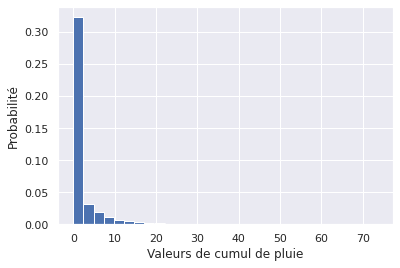

In [ ]:
# Histogramme des valeurs à prédire
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(Y_NoNA_2017, density=True, bins=30) 
plt.ylabel('Probabilité')
plt.xlabel('Valeurs de cumul de pluie');

In [ ]:
# Prévision idéale du cumul de pluie nul
Ypred_2017[Y_NoNA_2017 == 0] = 0

# Améliration significative de l'erreur de prédiciton !
np.mean(np.abs(Ypred_2017-Y_NoNA_2017)/(Y_NoNA_2017+1))*100

46.0796090742057

In [ ]:
# Prévision des valeurs non-nulles par modèle linéaire estimé sur les données de 2016
Y1 = Y_NoNA_2016[Y_NoNA_2016 > 0]
X1 = X_NoNA_2016[Y_NoNA_2016 > 0]

print(X1.shape)

(46777, 145)


In [ ]:
lr1= LinearRegression(normalize=False)
lr1.fit(X1, Y1)

Yhat1 = lr1.predict(X1)

In [ ]:
Ypred1 = lr1.predict(X_NoNA_2017[Y_NoNA_2017 > 0])
Ypred_2017[Y_NoNA_2017 > 0] = Ypred1

In [ ]:
# Améliration significative de l'erreur de prédiciton -> non !
np.mean(np.abs(Ypred_2017-Y_NoNA_2017)/(Y_NoNA_2017+1))*100

64.77598111516787